### Problem 1 (Operations on Complex Intervals).

A complex interval is defined as the set of all complex numbers whose real and imaginary parts lie within given intervals:

I = [a, b] + i[c, d] = { x + iy | x ∈ [a, b], y ∈ [c, d]}

Consider two complex intervals: $$
I_1 = [a_1, b_1] + i[c_1, d_1],\quad I_2 = [a_2, b_2] + i[c_2, d_2]
$$

(a) Compute the most precise complex interval soundly capturing the addition $I_1$ + $I_2$.

$I_1 + I_2 = [a_1 + a_2, b_1 + b_2] + i [c_1 + c_2, d_1 + d_2]$

(b) Repeat the above for $I_1$ · $I_2$.

$I_1 · I_2 = [a_1, b_1]·[a_2, b_2] - [c_1, d_1]·[c_2, d_2] + i [a_2, b_2]·[c_1, d_1] + i [a_1, b_1]·[c_2, d_2]$


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>



### Problem 2

(Certification using Zonotopes). Consider the following small neural network with two input neurons x1, x2 and two output neurons x5, x6. The network consists of an affine layer followed by a ReLU layer.

(a) Draw the 2D shape of ϕ.

Center point: (4, 3)

$A: (1, 0), ε_1 = -1, ε_2 = 1 $

$B: (7, 6), ε_1 = 1, ε_2 = 1 $

$C: (5, 2), ε_1 = 1, ε_2 = -1 $

$D: (3, 4), ε_1 = -1, ε_2 = 1 $

2D Shape:
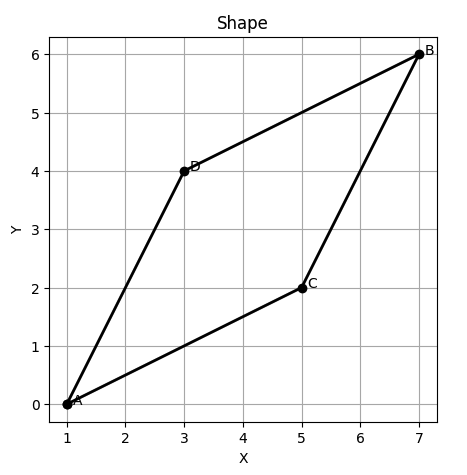



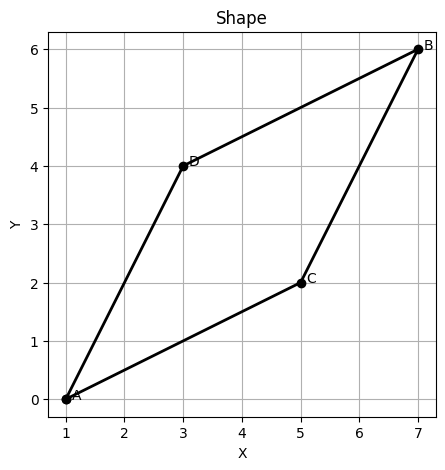

In [ ]:
import matplotlib.pyplot as plt

A = (1, 0)
B = (7, 6)
C = (5, 2)
D = (3, 4)

# A → C → B → D → A
x = [A[0], C[0], B[0], D[0], A[0]]
y = [A[1], C[1], B[1], D[1], A[1]]

plt.figure(figsize=(5,5))
plt.plot(x, y, 'k-', lw=2, marker='o')
plt.text(A[0]+0.1, A[1], "A")
plt.text(B[0]+0.1, B[1], "B")
plt.text(C[0]+0.1, C[1], "C")
plt.text(D[0]+0.1, D[1], "D")

plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Shape")
plt.show()


(b) Is it possible to design Zonotope transformers for the affine and ReLU layers to prove the property? If yes, then show them. If not, then why?

Yes, it is possible.

$x_5 = ReLU (2ε_1 + ε_2 + 4 + 2 (ε_1 + 2ε_2 + 3)) = ReLU (4ε_1 + 5ε_2 + 10)$
$x_6 = ReLU (ε_1 + 2 ε_2 + 3 - 2 ε_1 - ε_2 - 4) = ReLU (-ε_1 + ε_2 -1)$

$x_5 - x_6 = ReLU (4ε_1 + 5ε_2 + 10) - ReLU (-ε_1 + ε_2 -1)$

ReLU(z) = max(0, z):

$4ε_1 + 5ε_2 + 10 > 0, max (0, 4ε_1 + 5ε_2 + 10) = 4ε_1 + 5ε_2 + 10$

(1) When -ε_1 + ε_2 -1 > 0:
$x_5 - x_6 = max (0, 4ε_1 + 5ε_2 + 10 + ε_1 - ε_2 +1) = max (0, 5ε_1 + 4ε_2 + 9)$

$5ε_1 + 4ε_2 + 9 ≥  0, so x_5 ≥ x_6$ holds for all $x_1, x_2.$

(2) When -ε_1 + ε_2 -1 <= 0:
$x_5 - x_6 = max (0, 4ε_1 + 5ε_2 + 10 - 0) = max (0, 4ε_1 + 5ε_2 + 10)$


$4ε_1 + 5ε_2 + 10 > 0$, so $x_5 ≥ x_6$ holds for all $x_1, x_2.$


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
### Problem 3
(MILP encoding for Maxpool). In the lecture, we learned the Mixed Integer
Linear Programming (MILP) based encoding of the ReLU operation. In this exercise, your goal is to design an encoding of the Maxpool operation using MILP.

(a) Design a MILP encoding for the Maxpool operation y := max(x1, x2) where the input bounds for x1 and x2 are [a1, b1] and [a2, b2] with a1, a2, b1, b2 ∈ R.

Solution:

c ∈ {0, 1}

$y \ge x_1,$

$y \ge x_2,$

$y \le x_2 + (b_2 - a_2) c,$

$y \le x_1 + (b_1 - a_1) (1-c),$

$y \ge x_2 - (b_2 - a_2) c,$

$y \ge x_1 - (b_1 - a_1) (1-c),$



(b) Now, consider the neural network shown in Fig. 1. The neural network has two input (x1, x2) and two output (x9, x10) neurons and consist of two layers with affine transformations (edges colored blue) and one layer with maxpool operation (edges colored green). The transformations in the network are given as:

$$x3 := x1 + x2$$
$$x4 := x1 − 2$$
$$x5 := x1 − x2$$
$$x6 := x2$$
$$x7 := max(x3, x4)$$
$$x8 := max(x5, x6)$$
$$x9 := x7$$
$$x10 := −x7 + x8 − 0.5$$

Use the MILP encoding for ReLU and Maxpool for verifying the property that for all values of x1, x2 ∈ [0, 1], the output at x9 > x10. Can the MILP analysis prove this property? Show your work.

Solution:

**MILP encoding of Affine**

$x_3 = x_1 + x_2$

$x_4 = x_1 - 2$

$x_5 = x_1 - x_2$

$x_6 = x_2$

$x_9 = x_7$

$x_{10} = - x_7 + x_8 - 0.5$

**MILP encoding of ReLU**

$a_7, a_8 ∈ {0, 1}$

MILP encoding for $x_7 = max(x_3, x_4)$

$x_7 \ge x_3,$

$x_7 \ge x_4,$

$x_7 \le x_4 + (b_4 - a_4) a_7,$

$x_7 \le x_3 + (b_3 - a_3) (1-a_7),$

MILP encoding for $x_8 = max(x_5, x_6)$

$x_8 \ge x_5,$

$x_8 \ge x_6,$

$x_8 \le x_6 + (b_6 - a_6) a_8,$

$x_8 \le x_5 + (b_5 - a_5) (1-a_8),$

**Input bounds/MILP encoding of pre-condition**

$0 \le x_1 \le 1$,
$0 \le x_2 \le 1$

**Pre-computed box bounds**

$0 \le x_3 \le 2$,

$-2 \le x_4 \le -1$

$-1 \le x_5 \le 1$,

$0 \le x_6 \le 1$

$0 \le x_7 \le 2$,

$0 \le x_8 \le 1$

$0 \le x_9 \le 2$

$-2.5 \le x_{10} \le 0.5$

**MILP encoding of post-condition**

$min(x_9-x_{10})$

**Proof**

Since $0 \le x_3 \le 2$, $-2 \le x_4 \le -1$, $x_4 < x_3$, $a_7 = 1$, $x_7 = x_3$

Therefore, $0 \le x_7 \le 2$.

Case a_8 = 0, $x_6 \ge x_5$, $x_8 = x_6$

$0 \le x_8 \le 1$

$x_9 - x_{10} = x_7 - (- x_7 + x_8 - 0.5) = 2 x_7 - x_8 + 0.5 > 0.5$.

Therefore, $x_9 > x_{10}$.

Case a_8 = 1, $x_5 \ge x_6$, $x_8 = x_5$, $x_6 \ge 0,$ so $0 \le x_5 \le 1$ and $0 \le x_8 \le 1$

$x_9 - x_{10} = x_7 - (- x_7 + x_8 - 0.5) = 2 x_7 - x_8 + 0.5 > 0.5$

Therefore, $x_9 > x_{10}$.





<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### Problem 4 (Programming)

*Please refer to the code: https://github.com/Trac91iu/CS521FA25HW/blob/main/hw2/CS521_yichen59_hw2.ipynb*

(a)  Network Training. We provide a fully connected neural network. You need to train your network on MNIST with 15 epochs and report the clean accuracy.

I changed the parameter to be 15, and the clean accuracy has already been implemented in the test_model function. Also, I moved the Normalize layer into the class Net.

Here is my report:

Epoch 1/15, Loss: 2.012

Epoch 2/15, Loss: 1.729

Epoch 3/15, Loss: 1.627

Epoch 4/15, Loss: 1.596

Epoch 5/15, Loss: 1.582

Epoch 6/15, Loss: 1.572

Epoch 7/15, Loss: 1.566

Epoch 8/15, Loss: 1.561

Epoch 9/15, Loss: 1.557

Epoch 10/15, Loss: 1.553

Epoch 11/15, Loss: 1.550

Epoch 12/15, Loss: 1.547

Epoch 13/15, Loss: 1.545

Epoch 14/15, Loss: 1.542

Epoch 15/15, Loss: 1.540

Accuracy on images: 93.43



In [ ]:
# !pip install tensorboardX

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import time
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
# from tensorboardX import SummaryWriter

use_cuda = False
device = torch.device("cuda" if use_cuda else "cpu")
batch_size = 64

np.random.seed(42)
torch.manual_seed(42)


## Dataloaders
train_dataset = datasets.MNIST('mnist_data/', train=True, download=True, transform=transforms.Compose(
    [transforms.ToTensor()]
))
test_dataset = datasets.MNIST('mnist_data/', train=False, download=True, transform=transforms.Compose(
    [transforms.ToTensor()]
))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## Simple NN. You can change this if you want. If you change it, mention the architectural details in your report.
class Net(nn.Sequential):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(28*28, 200)
        self.fc2 = nn.Linear(200,10)

    def forward(self, x):
        x = (x - 0.1307)/0.3081
        x = x.view((-1, 28*28))
        x = F.relu(self.fc(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=-1) # added softmax for probabilities
        return x

class Normalize(nn.Module):
    def forward(self, x):
        return (x - 0.1307)/0.3081

# Add the data normalization as a first "layer" to the network
# this allows us to search for adverserial examples to the real image, rather than
# to the normalized image
# model = nn.Sequential(Normalize(), Net())

model = Net().to(device)
model.train()

def train_model(model, num_epochs):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.3f}')

def test_model(model):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(f'Accuracy on images: {100 * correct / total}')

train_model(model, 15) # train my network on MNIST with 15 epochs
test_model(model)



Epoch 1/15, Loss: 2.012
Epoch 2/15, Loss: 1.729
Epoch 3/15, Loss: 1.627
Epoch 4/15, Loss: 1.596
Epoch 5/15, Loss: 1.582
Epoch 6/15, Loss: 1.572
Epoch 7/15, Loss: 1.566
Epoch 8/15, Loss: 1.561
Epoch 9/15, Loss: 1.557
Epoch 10/15, Loss: 1.553
Epoch 11/15, Loss: 1.550
Epoch 12/15, Loss: 1.547
Epoch 13/15, Loss: 1.545
Epoch 14/15, Loss: 1.542
Epoch 15/15, Loss: 1.540
Accuracy on images: 93.43


(b) Implement interval analysis for your network. Use this to measure the robustness for the whole test set of your network for 10 l∞ neighborhoods, sized evenly between 0.01 and 0.1 (inclusive). Report the verified accuracy (the percentage of the images that are successfully verified) for those different values chosen. As usual, present your observations clearly along with experimental evidence (numbers, images, etc.) in your submission.

**Description**

Here, I moved the Normalize layer into class Net, and I also changed the parameter of class Net to nn.Sequential. Because I would run into an error without any change: `raise NotImplementedError('Module type not supported - add BoundModule for layer to factory')`.







In [ ]:
import timeit
from bound_propagation import BoundModelFactory, HyperRectangle

## TODO: Write the interval analysis for the simple model
## you can use https://github.com/Zinoex/bound_propagation

# This is just for testing the time of each methods, and I used it for testing the BoundModelFactory().
def timing(net):
    print('')
    print('[TIMING]')

    methods = [
        ('ibp', net.ibp),
        ('crown_ibp', lambda x: net.crown_ibp(x).concretize()),
        ('crown', lambda x: net.crown(x).concretize()),
        # ('alpha_crown_ibp', lambda x: net.crown_ibp(x, alpha=True).concretize()),
        # ('alpha_crown', lambda x: net.crown(x, alpha=True).concretize())
    ]

    for method_name, method in methods:
        print(f'Method: {method_name}')

        for batch_size, iterations in [(10, 1000), (100, 100), (1000, 10)]:
            x = torch.rand(batch_size, 28 * 28, device=device)
            x = HyperRectangle.from_eps(x, 0.01)
            exec_time = timeit.timeit(lambda: method(x), number=iterations)
            out_size = method(x).lower.size()

            print(f'Out size: {out_size}, iterations: {iterations}, execution time: {exec_time}')

net = Net().to(device)
factory = BoundModelFactory()
net = factory.build(net)
timing(net)




[TIMING]
Method: ibp
Out size: torch.Size([10, 10]), iterations: 1000, execution time: 0.9806589030004034
Out size: torch.Size([100, 10]), iterations: 100, execution time: 0.36585565299992595
Out size: torch.Size([1000, 10]), iterations: 10, execution time: 0.2813581239997802
Method: crown_ibp
Out size: torch.Size([10, 10]), iterations: 1000, execution time: 3.728137944000082
Out size: torch.Size([100, 10]), iterations: 100, execution time: 1.9063585740004783
Out size: torch.Size([1000, 10]), iterations: 10, execution time: 2.2411582229997293
Method: crown
Out size: torch.Size([10, 10]), iterations: 1000, execution time: 4.999499427999581
Out size: torch.Size([100, 10]), iterations: 100, execution time: 1.9413029970000935
Out size: torch.Size([1000, 10]), iterations: 10, execution time: 2.288679010999658


#### Description:

I have a warning here: `WARNING:bound_propagation.general:No parameters available for alpha-CROWN. Check architecture of network.` It seems the output for alpha_crown_ibp, alpha_crown and crown are the same. So I did not use alpha_crown_ibp, alpha_crown.

Here, based on the hint, what I did is (1) use different esp; (2) change the average adversarial margin to verified accuracy.

The first thing is easy, I just use `eps_list = torch.linspace(0.01, 0.10, 10).tolist()`, and use a loop to calculate verified accuracy.

The second one is calculating each input's adversarial margin. If the margin is greater than 0, we count it as a verified or certified case. Then using the verified number/total number to get the verified accuracy.

#### Result Report
Epoch 1/15, Loss: 2.011

Epoch 2/15, Loss: 1.704

Epoch 3/15, Loss: 1.662

Epoch 4/15, Loss: 1.618

Epoch 5/15, Loss: 1.588

Epoch 6/15, Loss: 1.576

Epoch 7/15, Loss: 1.568

Epoch 8/15, Loss: 1.562

Epoch 9/15, Loss: 1.558

Epoch 10/15, Loss: 1.554

Epoch 11/15, Loss: 1.551

Epoch 12/15, Loss: 1.548

Epoch 13/15, Loss: 1.545

Epoch 14/15, Loss: 1.543

Epoch 15/15, Loss: 1.541

Accuracy on images: 93.31

[VERIFY]
Method: ibp

[ibp] Verified accuracy: 0.073

[ibp] Verified accuracy: 0.000

[ibp] Verified accuracy: 0.000

[ibp] Verified accuracy: 0.000

[ibp] Verified accuracy: 0.000

[ibp] Verified accuracy: 0.000

[ibp] Verified accuracy: 0.000

[ibp] Verified accuracy: 0.000

[ibp] Verified accuracy: 0.000

[ibp] Verified accuracy: 0.000

Method: crown_ibp

[crown_ibp] Verified accuracy: 0.723

[crown_ibp] Verified accuracy: 0.560

[crown_ibp] Verified accuracy: 0.393

[crown_ibp] Verified accuracy: 0.258

[crown_ibp] Verified accuracy: 0.155

[crown_ibp] Verified accuracy: 0.087

[crown_ibp] Verified accuracy: 0.047

[crown_ibp] Verified accuracy: 0.020

[crown_ibp] Verified accuracy: 0.007

[crown_ibp] Verified accuracy: 0.003

Method: crown

[crown] Verified accuracy: 0.723

[crown] Verified accuracy: 0.560

[crown] Verified accuracy: 0.393

[crown] Verified accuracy: 0.258

[crown] Verified accuracy: 0.155

[crown] Verified accuracy: 0.087

[crown] Verified accuracy: 0.047

[crown] Verified accuracy: 0.020

[crown] Verified accuracy: 0.007

[crown] Verified accuracy: 0.003

In [ ]:
def adversarial_logit(y_hat, y):
    batch_size = y.size(0)
    classes = torch.arange(10, device=y.device).unsqueeze(0).expand(batch_size, -1)
    mask = (classes == y.unsqueeze(-1)).to(dtype=y_hat.lower.dtype)

    # Take upper bound for logit of all but the correct class where you take the lower bound
    adversarial_logit = (1 - mask) * y_hat.upper + mask * y_hat.lower

    return adversarial_logit

def adversarial_prob_margin(y_hat, y):
    batch_size = y.size(0)
    y_index = (torch.arange(batch_size, device=y.device), y)

    logit = adversarial_logit(y_hat, y)

    probs = F.softmax(logit, dim=1)
    label_probs = probs.gather(1, y.unsqueeze(1))

    others_mask = torch.ones_like(probs, dtype=torch.bool)
    others_mask[y_index] = False
    others_probs = probs[others_mask].view(batch_size, -1)

    return torch.min(label_probs - others_probs, dim=1).values


@torch.no_grad()
def verify(net, device):
    print('')
    print('[VERIFY]')
    eps_list = torch.linspace(0.01, 0.10, 10).tolist()

    methods = [
        ('ibp', net.ibp),
        ('crown_ibp', lambda x: net.crown_ibp(x).concretize()),
        ('crown', lambda x: net.crown(x).concretize()),
        # ('alpha_crown_ibp', lambda x: net.crown_ibp(x, alpha=True).concretize()),
        # ('alpha_crown', lambda x: net.crown(x, alpha=True).concretize())
    ]

    # Use to MNIST dataset
    transform, target_transform = construct_transform()
    test_data = datasets.MNIST('mnist_data/', train=False, download=True,
                                      transform=transform, target_transform=target_transform)
    test_loader = DataLoader(test_data, batch_size=100, shuffle=False, num_workers=8)


    for method_name, method in methods:
        print(f'Method: {method_name}')

        for eps in eps_list:
          correct_num = 0

          for i, (X, y) in enumerate(test_loader):
              X, y = X.to(device), y.to(device)
              X = HyperRectangle.from_eps(X, float(eps))
              y_hat = method(X)
              worst_margin = adversarial_prob_margin(y_hat, y)
              correct_num += (worst_margin > 0).sum().item() # calculate the correctly verified number

          print(f'[{method_name}] Verified accuracy: {correct_num / len(test_data):.3f}')

net = Net().to(device)
factory = BoundModelFactory()
net = factory.build(net)
train_model(net, 15) # train my network on MNIST with 15 epochs
test_model(net)
# timing(net)
verify(net, device)


Epoch 1/15, Loss: 2.011
Epoch 2/15, Loss: 1.704
Epoch 3/15, Loss: 1.662
Epoch 4/15, Loss: 1.618
Epoch 5/15, Loss: 1.588
Epoch 6/15, Loss: 1.576
Epoch 7/15, Loss: 1.568
Epoch 8/15, Loss: 1.562
Epoch 9/15, Loss: 1.558
Epoch 10/15, Loss: 1.554
Epoch 11/15, Loss: 1.551
Epoch 12/15, Loss: 1.548
Epoch 13/15, Loss: 1.545
Epoch 14/15, Loss: 1.543
Epoch 15/15, Loss: 1.541
Accuracy on images: 93.31

[VERIFY]
Method: ibp
[ibp] Verified accuracy: 0.073
[ibp] Verified accuracy: 0.000
[ibp] Verified accuracy: 0.000
[ibp] Verified accuracy: 0.000
[ibp] Verified accuracy: 0.000
[ibp] Verified accuracy: 0.000
[ibp] Verified accuracy: 0.000
[ibp] Verified accuracy: 0.000
[ibp] Verified accuracy: 0.000
[ibp] Verified accuracy: 0.000
Method: crown_ibp
[crown_ibp] Verified accuracy: 0.723
[crown_ibp] Verified accuracy: 0.560
[crown_ibp] Verified accuracy: 0.393
[crown_ibp] Verified accuracy: 0.258
[crown_ibp] Verified accuracy: 0.155
[crown_ibp] Verified accuracy: 0.087
[crown_ibp] Verified accuracy: 0.047

<br><br><br><br><br><br>

### Bonus Research Question

In this problem, we ask you to compute
bounds on the worst-case error function for a VAE model with two inputs x1 and x2, when the same noise v with ||v||∞ ≤ ϵ, ϵ ∈ R is added to them. The bound should hold with at least 95% probability. The worst-case error with respect to a given noise v added to xi refers to the reconstruction loss (mean-squared error) between the original input xi+v to the encoder and the point on the corresponding output distribution at the decoder maximizing the error. You can consider a ReLU-based encoder and ReLU-based decoder, such as the one available at https://github.com/uiuc-focal-lab/ civet/tree/main. You can also refer to the paper here [XBVS25] and [LXS+23], which is a real-world example of studying UAP on a VAE model. To adapt to the VAE model, you need to find the support set for the same noise added to those two inputs and bound the worst-case error of the decoder using relational verifications by designing a difference tracker.

Solution:

**(a) Support set.**

The goal of VAE is to rebuild y $\approx$ x. Now given two inputs $x_1$ and $x_2$, we want to add noise v where ||v||∞ ≤ ϵ, ϵ ∈ R. To see the worst-case error $max_{Y∈y} T(Y)$ (we use MSE), we need to first define support sets.

If I use z as the output of VAE encoder, after adding noise v, we have: $$z_i = encode(x_i + v), i∈{1, 2} $$

Or:

$$z_i ∼ N(μ_i(x_i + v), σ_i^2(x_i+v)),i∈{1,2}$$

Follow the 1D case mentioned in the slides in class, we need at least 95% probability, so for seperate support set for each dimention j: $$S_{i,j} = [μ_{i,j}^{lb} - 1.96σ_{i,j}, μ_{i,j}^{ub} + 1.96σ_{i,j}]$$

Next, for joint support set:

$$S_j = S_{1,j} \cap S_{2,j}$$

$$S_j = [min(μ_{1,j}^{lb}, μ_{2,j}^{lb}) - max(1.96σ_{1,j}, 1.96σ_{2,j}), max(μ_{1,j}^{ub}, μ_{2,j}^{ub}) + max(1.96σ_{1,j}, 1.96σ_{2,j})]$$

Finally, calculate support set S:

$$
S = \prod_{j=1}^{d} S_j
$$

In the code, I find a function ibp_latent is used for calculating the support sets. But I did not run it.

**(b) A difference tracker design.**

For each input $$x_i → encoder → z_i → decoder → y_i, i∈{1,2}$$

We want a difference tracker to record

$$Δ = y_1 - y_2$$

More specifically, for each decoder layer, the difference tracker need to maintain the Δ. In the case of civet, I find linear layer and ReLU layers. We propagate the difference.

$$ Linear: Δ_{l+1} = W_l Δ_l$$
$$ ReLU: |Δ_{l+1}| \le |Δ_l|$$

And in the worst case, we can get the bound $Δ_{max} \le V$ using relational verification, where V is the upper bound of the Δ.





